In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas_datareader import data, wb
from datetime import datetime, timedelta
import numpy as np
%matplotlib inline
import sqlite3

# Ativos da Carteira

In [4]:
conn = sqlite3.connect('ativos.db')
cursor = conn.cursor()
#Cria o array de ativos e dos ativos com quantidade
query =" SELECT sigla, qtd FROM ativos WHERE moeda = 'DIGITAL' ;"
cursor.execute(query)
ativos_qtd = {}
ativos = []
pesos = []
for linha in cursor:
    ativos_qtd[linha[0]] = linha[1] 
    ativos.append(linha[0]) 
conn.close()


In [5]:
start = datetime(2018,1,1)
ativos

['LTC-USD', 'ADA-USD']

In [6]:
#ativos/ações 
tickers= ativos

#busca os ativos de acordo com a data inicial 
acoes=pd.DataFrame()
for t in tickers:
    acoes[t]= data.DataReader(t, data_source='yahoo', start=start)['Adj Close']


In [7]:
#Calcula o valor total das acoes na carteira - (cotação do ativo * qtd)
total = 0.0
for key, value in ativos_qtd.items():
    #total += (acoes[key].tail(2)[0].sum() * value)
    total += (acoes[key].tail(1).sum() * value)
    #tambem pode pegar a media do periodo
    #total += (acoes[key].sum() * value)

#cria o array de  peso do ativos contidos na carteira    
# cotação do ativo * quantidade em carteira / total da carteira
pesos = []
for key, value in ativos_qtd.items():
     #"%.4f" % (acoes[key].tail(1).sum() *  value / total)
    pesos.append(round(acoes[key].tail(1).sum() *  value / total,4))


In [8]:
acoes.tail(12)

,LTC-USD,ADA-USD
Date,,
2021-02-28,164.927170,1.308059
2021-03-01,175.237900,1.292388
2021-03-02,177.872437,1.225582
2021-03-03,188.525665,1.216593
2021-03-04,181.078644,1.114868
2021-03-05,180.765610,1.168523
2021-03-06,182.981903,1.131012
2021-03-07,190.759109,1.133367
2021-03-08,191.927689,1.118053


# Retorno Simples = PF - PI / PI

In [9]:
#retorno diario dos aivos ( ideal para calculo de várias ações)
returns = acoes / acoes.shift(1) - 1
#returns.head()

In [10]:
#Returno diário da Ambev
#returns["ABEV3.SA"].plot(figsize=(8,5))
#returns["ABEV3.SA"].plot()

In [11]:
#media do retorno diário das acoes 
avg_returns_d = returns.mean()
#avg_returns_d

In [12]:
#Retorno médio anual
avg_returns_a = returns.mean() * 250
#print(str(round(avg_returns_a["ABEV3.SA"] ,5) * 100) + "%")  
print(str(round(avg_returns_a ,5) * 100))  

LTC-USD    31.888
ADA-USD    56.755
dtype: float64


# Retorno Logaritmo = log(PF/PI) ou log(PF) - log(PI)

In [13]:
#retorno logaritmo ( ideal para calculo de uma unica ação)
log_returns = np.log(acoes / acoes.shift(1)) 
#log_returns.head()

In [14]:
#media do retorno logaritmo diário das acoes 
avg_log_returns_d = log_returns.mean()
#avg_log_returns_d

In [15]:
#Retorno médio anual
avg_log_returns_a = log_returns.mean() * 250
print(str(round(avg_log_returns_a ,5) * 100))  

LTC-USD   -3.117
ADA-USD    9.395
dtype: float64


# Taxa de Retorno do Portfólio
##  retorno = taxa de reotorno de um ativo * peso no portofolio

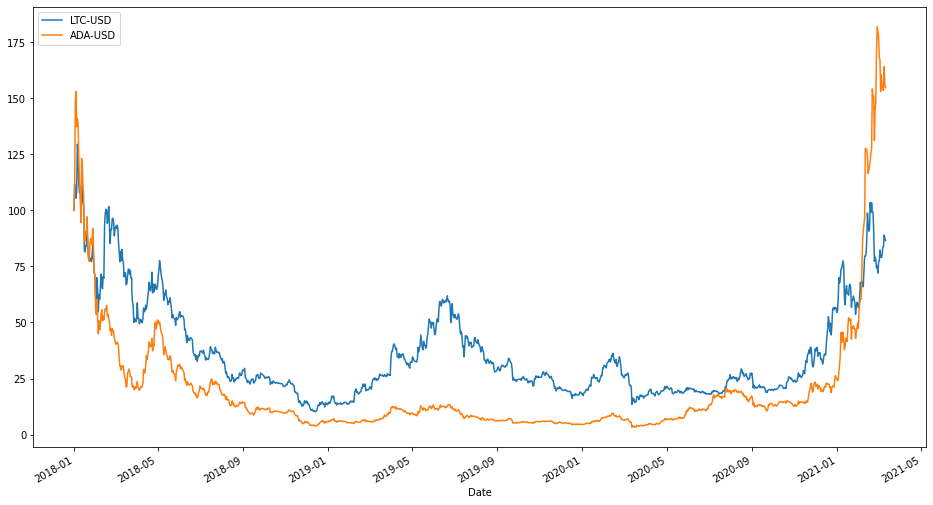

In [16]:
#normaliza atual / primeira * 100 neste caso toda a primeira será 100 tendo assim um ponto de referência
#evolução das ações(dados do yahoo finance)
(acoes / acoes.iloc[0] * 100).plot(figsize = (16,9));
plt.legend()
plt.show()

In [17]:
# neste caso estou colocando valores randomicamente e gerar os  meus pesos
#weights = np.random.random(len(ativos))
weights = pesos
weights /= np.sum(weights)
weights


array([0.4873, 0.5127])

In [18]:
portofolio_1 = str(round(np.dot(avg_returns_a, weights),5) *100) + ' %'
print(portofolio_1) 


44.637 %


In [19]:
sum(weights)

1.0